# Onramp Twitch Data Science Apprenticeship
Technical Interview - Guided Case Study
## Business Problem
You are a data scientist working for a motorcycle company. The CEO has asked you to come up with a new marketing strategy based on the sales data you've collected over the years. You'll need to show how you would prepare and process the data, how you would analyze the data, and how you would come up with the strategy and report for the CEO.

### Gain Context
- Is this a physical store only? Do they have an e-commerce element to their business? 
- Is there an issue with marketing that is trying to be fixed or is this just an attempt to try something new?
- What has been the success metric for marketing plans thus far?
- What are their main marketing channels?
- Historically have marketing campaigns lasted a certain length? This could be either due to effectiveness or financial. If answer not known, I did a bit of research and the common benchmark seems to be to monthly or quarterly. Because we don't have a lot of data - perhaps we do monthly.

### Clarifying Business Impact Metric
What is the goal of the new marketing strategy? What Key Performance Indicator (KPI) should we maximize:
- Revenue growth. If so what frequency makes the most sense - daily, monthly, quarterly, annual? Only issue here is looking through the data we really don't have info about expenses so we can't look at profit.
- Increase number of customers. Same question about frequency.
- Increase number of products sold? All products or certain products?
- I suggest we combine the first two and use **revenue per client** (total revenue in given time period divided by number of clients

## Data Understanding

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
df = pd.read_csv('moto_sample_sales.csv')
pd.set_option('display.max_columns', None)

In [160]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2.13E+09,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,#ERROR!,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6.27E+09,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6.51E+09,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [161]:
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,Ships,54,S72_3212,Gifts4AllAges.com,6.18E+09,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
ORDERNUMBER         2823 non-null int64
QUANTITYORDERED     2823 non-null int64
PRICEEACH           2823 non-null float64
ORDERLINENUMBER     2823 non-null int64
SALES               2823 non-null float64
ORDERDATE           2823 non-null object
STATUS              2823 non-null object
QTR_ID              2823 non-null int64
MONTH_ID            2823 non-null int64
YEAR_ID             2823 non-null int64
PRODUCTLINE         2823 non-null object
MSRP                2823 non-null int64
PRODUCTCODE         2823 non-null object
CUSTOMERNAME        2823 non-null object
PHONE               2823 non-null object
ADDRESSLINE1        2823 non-null object
ADDRESSLINE2        302 non-null object
CITY                2823 non-null object
STATE               1337 non-null object
POSTALCODE          2747 non-null object
COUNTRY             2823 non-null object
TERRITORY           1749 non-null obje

In [163]:
df.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [164]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [165]:
# our two potential targets would be some aggregate of sales or quantity ordered

In [166]:
df.YEAR_ID.value_counts()

2004    1345
2003    1000
2005     478
Name: YEAR_ID, dtype: int64

In [167]:
df.STATUS.value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

In [168]:
df.COUNTRY.value_counts()

USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: COUNTRY, dtype: int64

In [169]:
df.PRODUCTLINE.value_counts()

Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: PRODUCTLINE, dtype: int64

## Data Cleaning

### only include completed sales

In [171]:
df = df.loc[(df['STATUS']=='Shipped') | (df['STATUS']=='Resolved')]

In [172]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2.13E+09,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,#ERROR!,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6.27E+09,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6.51E+09,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


### convert date column to date time

In [173]:
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"])

In [174]:
df = df.sort_values(by="ORDERDATE").reset_index()

In [175]:
df.head()

,index,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,680,10100,50,67.80,2,3390.00,2003-01-06,Shipped,1,1,2003,Vintage Cars,60,S18_2248,Online Diecast Creations Co.,6.04E+09,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
1,578,10100,30,100.00,3,5151.00,2003-01-06,Shipped,1,1,2003,Vintage Cars,170,S18_1749,Online Diecast Creations Co.,6.04E+09,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
2,1267,10100,22,86.51,4,1903.22,2003-01-06,Shipped,1,1,2003,Vintage Cars,92,S18_4409,Online Diecast Creations Co.,6.04E+09,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
3,2024,10100,49,34.47,1,1689.03,2003-01-06,Shipped,1,1,2003,Vintage Cars,41,S24_3969,Online Diecast Creations Co.,6.04E+09,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
4,728,10101,25,100.00,4,3782.00,2003-01-09,Shipped,1,1,2003,Vintage Cars,127,S18_2325,"Blauer See Auto, Co.",#ERROR!,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Medium


### select desired columns

In [176]:
df.columns

Index(['index', 'ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH',
       'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID',
       'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME',
       'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [177]:
columns = ['ORDERDATE',
           'PRODUCTLINE',
           'QUANTITYORDERED',
           'PRICEEACH',
           'SALES','DEALSIZE',
           'CUSTOMERNAME','CITY','COUNTRY',
           'YEAR_ID', 'QTR_ID', 'MONTH_ID',
           'STATUS'
           ]

In [178]:
df = df[columns]

In [179]:
df.head()

,ORDERDATE,PRODUCTLINE,QUANTITYORDERED,PRICEEACH,SALES,DEALSIZE,CUSTOMERNAME,CITY,COUNTRY,YEAR_ID,QTR_ID,MONTH_ID,STATUS
0,2003-01-06,Vintage Cars,50,67.80,3390.00,Medium,Online Diecast Creations Co.,Nashua,USA,2003,1,1,Shipped
1,2003-01-06,Vintage Cars,30,100.00,5151.00,Medium,Online Diecast Creations Co.,Nashua,USA,2003,1,1,Shipped
2,2003-01-06,Vintage Cars,22,86.51,1903.22,Small,Online Diecast Creations Co.,Nashua,USA,2003,1,1,Shipped
3,2003-01-06,Vintage Cars,49,34.47,1689.03,Small,Online Diecast Creations Co.,Nashua,USA,2003,1,1,Shipped
4,2003-01-09,Vintage Cars,25,100.00,3782.00,Medium,"Blauer See Auto, Co.",Frankfurt,Germany,2003,1,1,Shipped


## Data Exploration

### WHO: which customer is bringing in highest value?

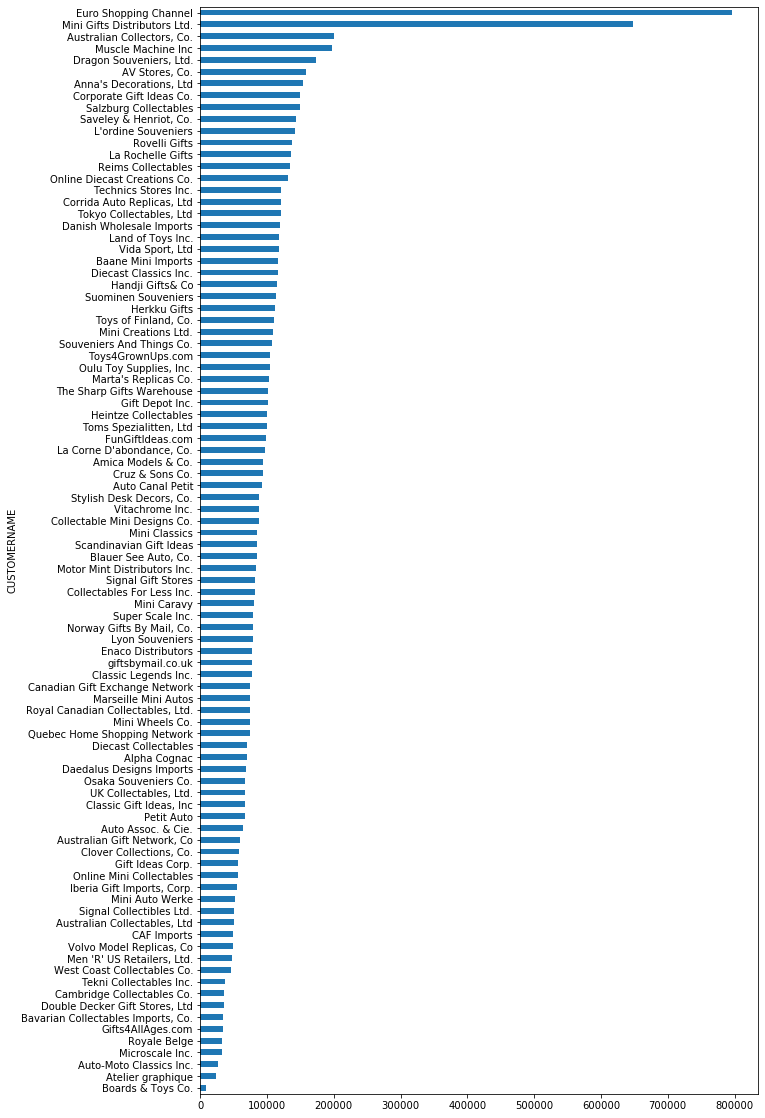

In [180]:
plt.figure(figsize=(10, 20))
df.groupby("CUSTOMERNAME").sum()['SALES'].sort_values(ascending=True).plot.barh()

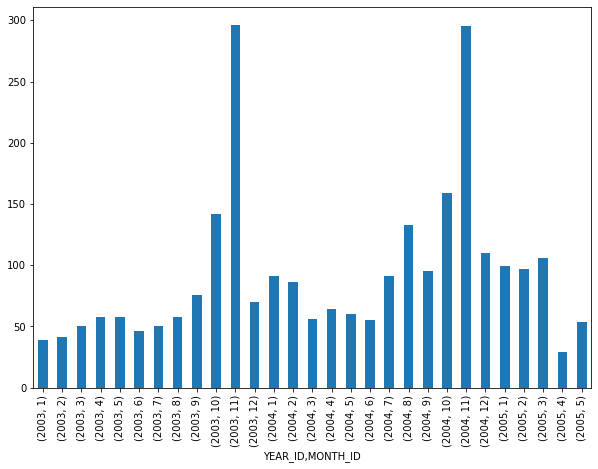

In [196]:
plt.figure(figsize=(10, 7))
df.groupby(["YEAR_ID","MONTH_ID"]).count()['CUSTOMERNAME'].plot.bar()

### WHAT: which product is selling the most?

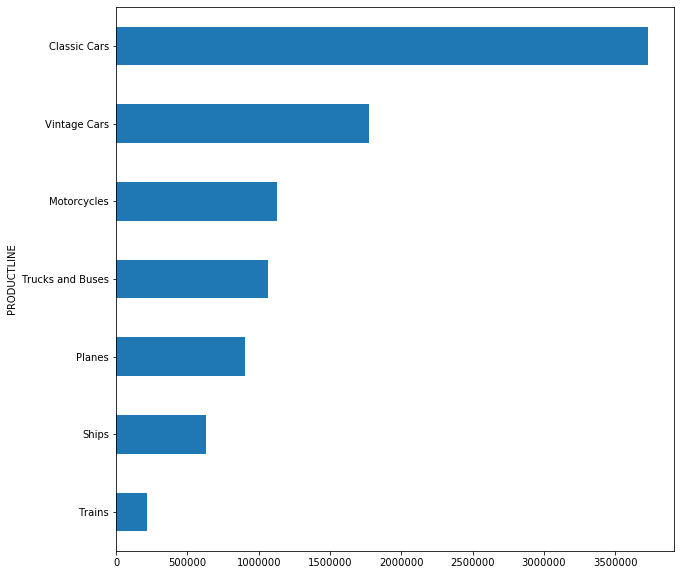

In [181]:
plt.figure(figsize=(10, 10))
df.groupby("PRODUCTLINE").sum()['SALES'].sort_values(ascending=True).plot.barh()

### WHEN: which time frame has highest sales?

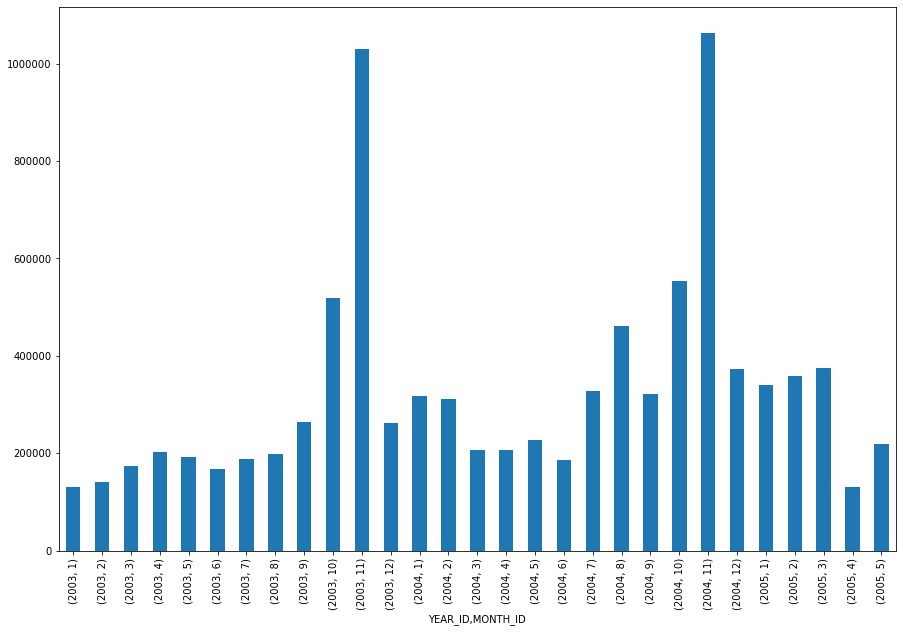

In [183]:
plt.figure(figsize=(15, 10))
df.groupby(["YEAR_ID","MONTH_ID"]).sum()["SALES"].plot.bar()

In [184]:
products = list(set(df.PRODUCTLINE.values))

In [185]:
products

['Trucks and Buses',
 'Planes',
 'Trains',
 'Motorcycles',
 'Classic Cars',
 'Ships',
 'Vintage Cars']

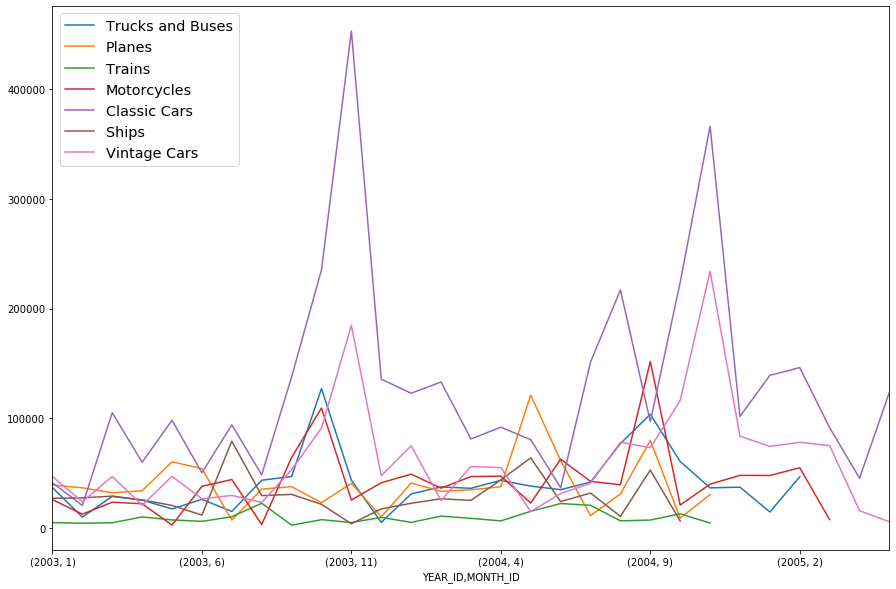

In [186]:
plt.figure(figsize=(15, 10))

for product in products:
    df[df['PRODUCTLINE'] == product].groupby(["YEAR_ID","MONTH_ID"]).sum()["SALES"].plot(label=product)

plt.legend(loc="upper left", fontsize='x-large')

### WHERE: what countries have the best sales?

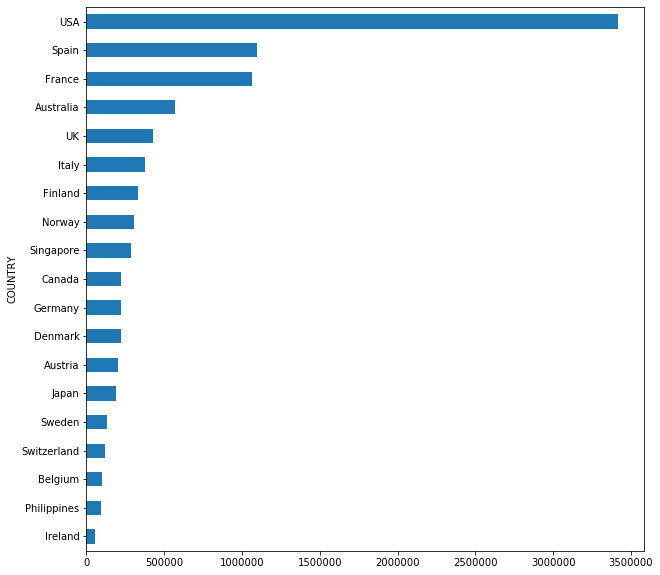

In [187]:
plt.figure(figsize=(10, 10))
df.groupby("COUNTRY").sum()['SALES'].sort_values(ascending=True).plot.barh()

In [203]:
df.groupby(["YEAR_ID","MONTH_ID"]).count()['CUSTOMERNAME']

50